In [41]:
import tensorflow as tf
# import keras.backend as K
# from keras import optimizers
# from keras import initializers
# from keras.layers import Input, Conv2D, Dropout, MaxPooling2D, Flatten, Dense,AveragePooling2D
from keras.datasets import cifar100
# from keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D, Flatten, Dense,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [24]:
#Load dataset
(X_c_train, y_c_train), (X_c_test, y_c_test) = cifar100.load_data(label_mode='coarse')
(X_f_train, y_f_train), (X_f_test, y_f_test) = cifar100.load_data(label_mode='fine')

X_train = X_c_train
X_test = X_f_test
y_train = [y_c_train,y_f_train]
y_test = [y_c_test,y_f_test]

num_classes_c = len(set([v[0] for v in y_c_train]))
num_classes_f = len(set([v[0] for v in y_f_train]))



In [38]:
def get_model1():
    #Shared layers
    in_layer = Input(shape=(32, 32, 3), dtype='float32', name='main_input')
    conv_base = Conv2D(32,kernel_size=(3, 3), activation="relu")(in_layer)
    conv_base = MaxPooling2D(pool_size=(2, 2))(conv_base)
    conv_base = Flatten()(conv_base)

    #coarse model
    out_c = Dense(num_classes_c, activation="softmax", name='out_c')(conv_base)
    #fine model 
    out_f = Dense(num_classes_f, activation="softmax", name='out_f')(conv_base)
    model = Model(
            inputs=in_layer,
            outputs=[out_c, out_f])
    loss = keras.losses.SparseCategoricalCrossentropy()
    optimizer = keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer=optimizer, 
                  loss=[loss, loss],
                  metrics=['accuracy'])
    return model


In [46]:
batch = 64
model = get_model1()
model.summary()
#train model
history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_test, y_test), 
                    batch_size=batch, 
                    epochs=15)


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 30, 30, 32)   896         main_input[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 15, 15, 32)   0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
flatten_8 (Flatten)             (None, 7200)         0           max_pooling2d_8[0][0]            
____________________________________________________________________________________________

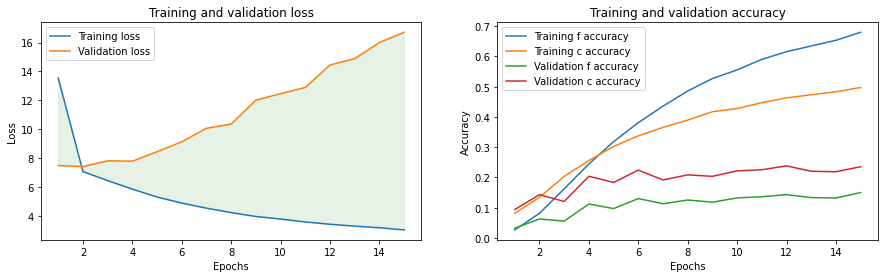

In [47]:
out_f_accuracy = history.history['out_f_accuracy']
out_c_accuracy = history.history['out_c_accuracy']
val_out_f_accuracy = history.history['val_out_f_accuracy']
val_out_c_accuracy = history.history['val_out_c_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, out_f_accuracy, label='Training f accuracy')
plt.plot(epochs, out_c_accuracy, label='Training c accuracy')
plt.plot(epochs, val_out_f_accuracy, label='Validation f accuracy')
plt.plot(epochs, val_out_c_accuracy, label='Validation c accuracy')
# plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()